In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings('ignore')

## [DSO] Machine Learning Seminar Vol.9
2020-09-xx  
SKUE

In [2]:
Image(url="https://image.yodobashi.com/product/100/000/009/002/935/105/100000009002935105_10204.jpg")

# 回帰分析 - 連続値をとる目的変数の予測
+ データセットの探索と可視化
+ 線形回帰モデルを実装するための各種アプローチ
+ 外れ値に対して頑健な回帰のトレーニング
+ 回帰モデルの評価と一般的な問題の診断
+ 回帰モデルの非線形データでの学習

## 線形回帰

### 単線形回帰

$$y=w_{0}+w_{1}x$$

### 重線形回帰

$$y=w_{0}x_{0}+ w_{1}x_{1}+ \dots + w_{m}x_{m} = \sum_{i=0}^{m}w_{i}x_{i}=w^{T}x $$

## Housingデータセットの探索
+ どんなデータなのか？

### Housingデータセットをデータフレームに読み込む

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                                'python-machine-learning-book-2nd-edition/'
                                'master/code/ch10/housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', ' AGE', 'DIS', 'RAD',
                          'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### データセットの重要な特性を可視化する

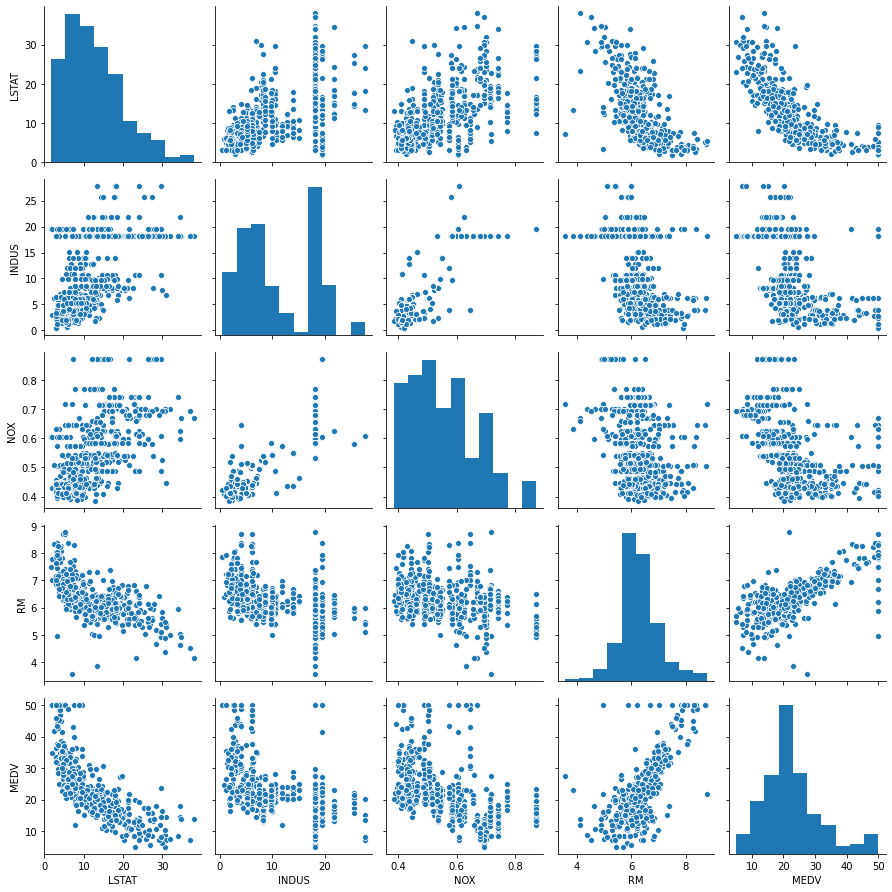

CPU times: user 6.57 s, sys: 197 ms, total: 6.77 s
Wall time: 5.42 s


In [5]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# 変数のペアの関係をプロット
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

### 相関行列を使って関係を調べる
+ ピアソンの積率相関係数

$$ r = \frac{\sum_{i=1}^{n} \left [ \left ( x^{(i)} - \mu_{x} \right ) \left ( y^{(i)} - \mu_{y} \right ) \right ] }{ \sqrt { \sum_{i=1}^{n} \left ( x^{(i)} - \mu_{x} \right )^2} \sqrt { \sum_{i=1}^{n} \left ( y^{(i)} - \mu_{y} \right )^2}} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}} $$

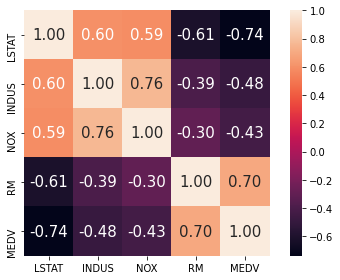

In [6]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                                  cbar=True,
                                  annot=True,
                                  square=True,
                                  fmt='.2f',
                                  annot_kws={'size':15},
                                  yticklabels=cols,
                                  xticklabels=cols)
plt.tight_layout()
plt.show()

## 最小二乗線形回帰モデルの実装
+ 最小二乗法

### 勾配降下法を使って回帰パラメータの回帰を解く

In [13]:
# 基本的な線形回帰モデル：第2章のAdalineGDのクラスを参照
class LinearRegressionGD(object):
    # 初期化を実行する__init__
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta # 学習率
        self.n_iter = n_iter # トレーニング回数
        
    # トレーニングを実行するfit
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    # 総入力を計算するnet_input
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # 予測値を計算するpredict
    def predict(self, X):
        return self.net_input(X)

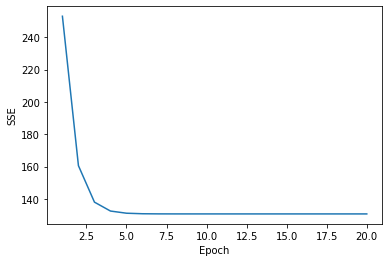

In [14]:
from sklearn.preprocessing import StandardScaler

X = df[['RM']].values
y = df['MEDV'].values

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_std, y_std)

# エポック数とコストの関係を表す折れ線グラフのプロット
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

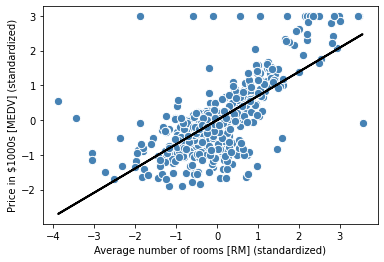

In [15]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [18]:
num_rooms_std = sc_x.transform([[5.0]]) # 教科書だと違う。[]が一つ多くなる。
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


In [19]:
print('Slope: %.3f' % lr.w_[1])

Slope: 0.695


In [20]:
print('Intercept: %.3f' % lr.w_[0])

Intercept: -0.000


### scikit-learnを使って回帰モデルの係数を推定する

In [21]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


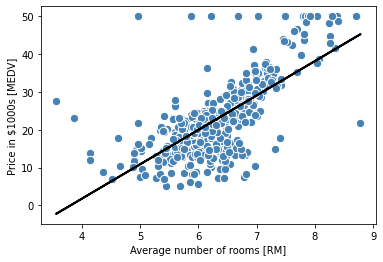

In [24]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

## RANSACを使ったロバスト回帰モデルの学習
+  RANSAC(Random Sample Consensus)

In [25]:
from sklearn.linear_model import RANSACRegressor

# ロバスト回帰モデルのクラスをインスタンス化
ransac = RANSACRegressor(LinearRegression(),
                                                 max_trials=100,
                                                 loss='absolute_loss',
                                                 residual_threshold=5.0,
                                                 random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), random_state=0,
                residual_threshold=5.0)

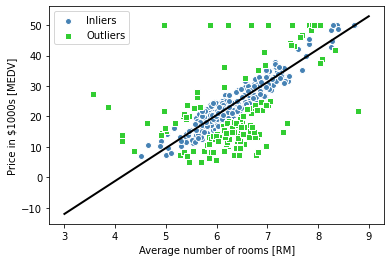

In [27]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

# 正常値をプロット
plt.scatter(X[inlier_mask], y[inlier_mask],
                    c='steelblue', edgecolors='white', marker='o', label='Inliers')
# 外れ値をプロット
plt.scatter(X[outlier_mask], y[outlier_mask],
                    c='limegreen', edgecolors='white', marker='s', label='Outliers')
# 予測値をプロット
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [29]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])

print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.815
Intercept: -44.440


## 線形回帰モデルの性能評価

In [30]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                                       test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

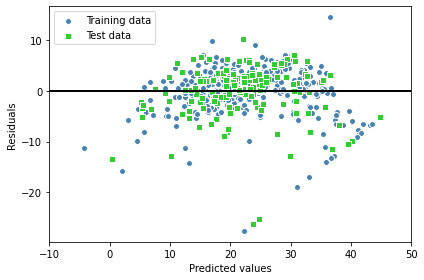

In [31]:
plt.scatter(y_train_pred, y_train_pred - y_train,
                    c='steelblue', marker='o', edgecolor='white',  label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
                    c='limegreen', marker='s', edgecolor='white',  label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

平均二乗誤差

In [32]:
from sklearn.metrics import mean_squared_error

# 平均二乗誤差を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                                                  mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


決定係数

In [33]:
# R^2のスコアを出力
from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                                                                  r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


## 回帰に正則化手法を使用する
+ リッジ回帰
+ LASSO
+ Elastic Net

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

## 多項式回帰：線形回帰モデルから曲線出す

$$y=w_{0}+w_{1}x+w_{2}x^{2} + \dots + w_{d}x^{d}$$

### scikit-learnを使って多項式の項を追加する

In [37]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

# 線形回帰モデルのインスタンス化
lr = LinearRegression()
pr = LinearRegression()

# 2次の多項式特徴量のクラスをインスタンス化
quadratic = PolynomialFeatures(degree=2)

# データに適合させ、データを変換
X_quad = quadratic.fit_transform(X)

## 単回帰
# データに適合させる
lr.fit(X, y)

# np.newaxisで列ベクトルにする
X_fit = np.arange(250, 600, 10)[:, np.newaxis]

# 予測値を計算
y_lin_fit = lr.predict(X_fit)


## 多項式回帰
# データに適合させる
pr.fit(X_quad, y)

# 2次式でyの値を計算
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

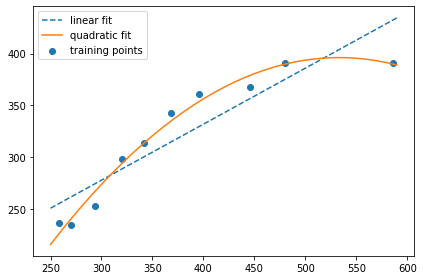

In [38]:
# 散布図、線形回帰モデル、多項式回帰モデルの結果をプロット
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [39]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Trainig MSE linear: %.3f, quadratic: %.3f' % (mean_squared_error(y, y_lin_pred),
                                                                                        mean_squared_error(y, y_quad_pred)))

print('Training R^2 linear: %.3f, quadratic: %.3f' % (r2_score(y, y_lin_pred),
                                                                                         r2_score(y, y_quad_pred)))

Trainig MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


### Housingデータセットで非線形関係をモデル化する

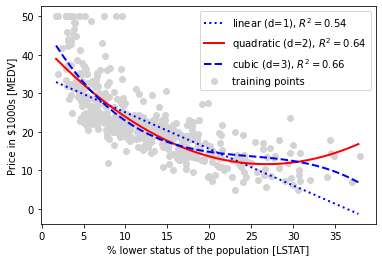

In [43]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

# 2次と3次の特徴量を作成
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# 2次の特徴量の学習、予測、決定係数の計算
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# 3次の特徴量の学習、予測、決定係数の計算
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# 各モデルの結果をプロット
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$' % cubic_r2, color='blue', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

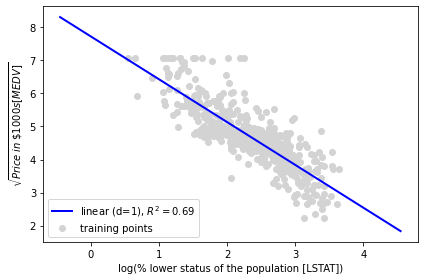

In [45]:
# 特徴量を変換
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 特徴量の学習、予測、決定係数の計算
X_fit = np.arange(X_log.min() - 1, X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# 射影したデータを使った学習結果をプロット
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s [MEDV]}$')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

被説明変数を変換しているので比較してはいけないのでは？

### ランダムフォレストを使って非線形関係に対処する
+ 決定木回帰

$$I(t)  = MSE(t)=\frac{1}{N_{t}}\sum_{i \in D_{t}}\left ( y^{(i)} - \hat y_{t} \right )^2$$

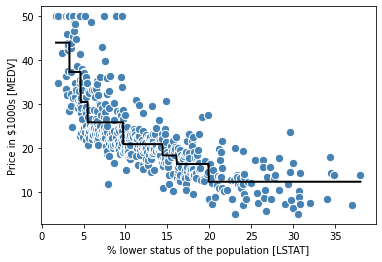

In [49]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

# 決定木回帰モデルのクラスをインスタンス化：max_depthで決定木の深さを指定
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

# argsortはソート後のインデックスを返し、flattenは1次元の配列を返す
sort_idx = X.flatten().argsort()

# 散布図と回帰直線を作成
lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

+ ランダムフォレスト回帰
 + データセットの外れ値に影響をあまり受けない
 + パラメータチューニングをそれほど必要しない

In [51]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                                        test_size=0.4,
                                                                                        random_state=1)

from sklearn.ensemble import RandomForestRegressor
# ランダムフォレスト回帰のクラスをインスタンス化
forest = RandomForestRegressor(n_estimators=1000,
                                                            criterion='mse',
                                                            random_state=1,
                                                            n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# MSE（平均二乗誤差）を出力
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                                                  mean_squared_error(y_test, y_test_pred)))

# R^2を出力
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),
                                                                  r2_score(y_test, y_test_pred)))

MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


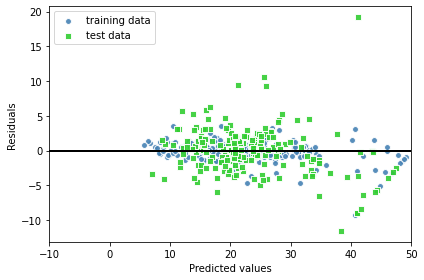

In [53]:
# 予測値と残差をプロット
plt.scatter(y_train_pred,
                    y_train_pred - y_train,
                    c = 'steelblue',
                    edgecolor='white',
                    marker='o',
                    s=35,
                    alpha=0.9,
                   label='training data')

plt.scatter(y_test_pred,
                    y_test_pred - y_test,
                    c = 'limegreen',
                    edgecolor='white',
                    marker='s',
                    s=35,
                    alpha=0.9,
                   label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()